# We use the openai clip model

In [2]:
!pip install -U sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [7]:
!pip install torch

In [9]:
!pip install torch torchvision torchaudio


In [10]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import torch
import matplotlib.pyplot as plt
import torch
import os
import glob

In [11]:
model = SentenceTransformer('clip-ViT-B-32')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [12]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

--2025-05-13 16:37:36--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1922426838 (1.8G) [application/zip]
Saving to: ‘unsplash-25k-photos.zip’

unsplash-25k-photos 100%[===================>]   1.79G  7.97MB/s    in 3m 23s  

2025-05-13 16:41:00 (9.02 MB/s) - ‘unsplash-25k-photos.zip’ saved [1922426838/1922426838]



In [13]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

Streaming output truncated to the last 5000 lines.
  inflating: photos/ErnD0oSB9OE.jpg  
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  

In [14]:
img_names = list(glob.glob('photos/*.jpg'))[:2000]

In [15]:
print(len(img_names))

2000


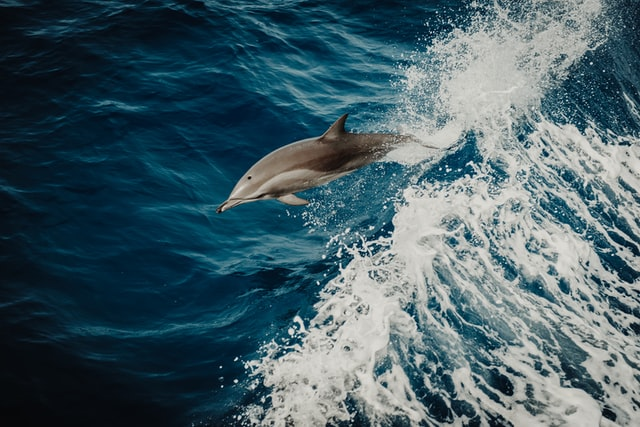

In [16]:
Image.open(img_names[0])

In [17]:
a = Image.open(img_names[1])

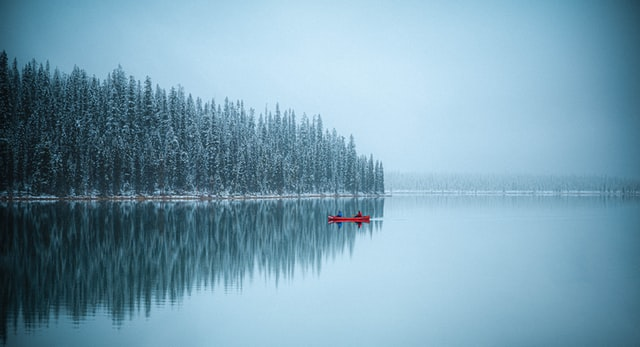

In [18]:
a

In [19]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [20]:
img_folder = '/photos'

In [34]:
def search(query, k = 3):
  query_embed = model.encode([query], convert_to_tensor=True,show_progress_bar=False)
  hits = util.semantic_search(query_embed, img_embed, top_k=k)[0]
  print(hits)

  print("\nQuery", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


[{'corpus_id': 1726, 'score': 0.2903998792171478}, {'corpus_id': 648, 'score': 0.2885313630104065}, {'corpus_id': 792, 'score': 0.28777363896369934}]

Query dog


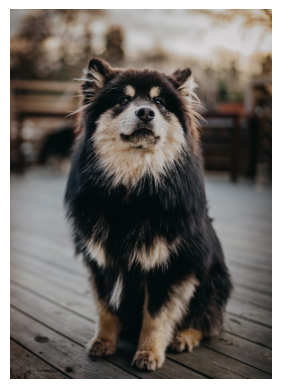

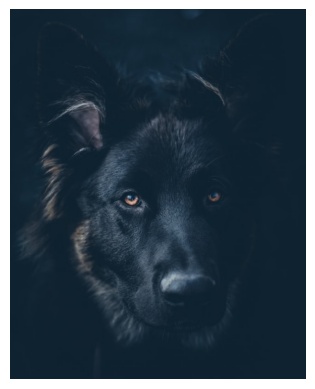

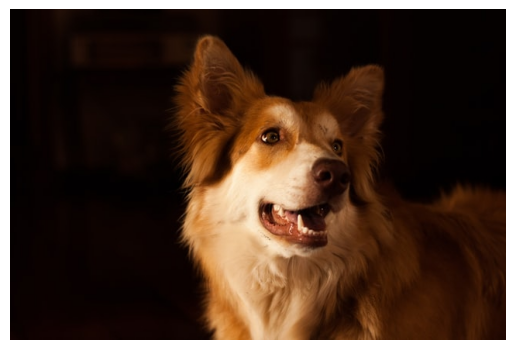

In [35]:
search('dog')

[{'corpus_id': 1019, 'score': 0.3084174394607544}, {'corpus_id': 920, 'score': 0.29827991127967834}, {'corpus_id': 1530, 'score': 0.2868967652320862}]

Query cat on a wall


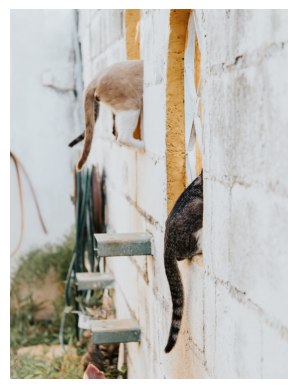

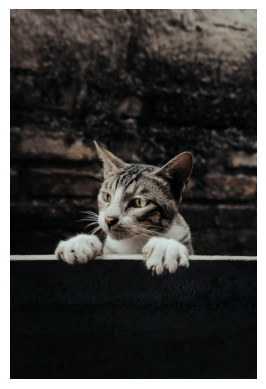

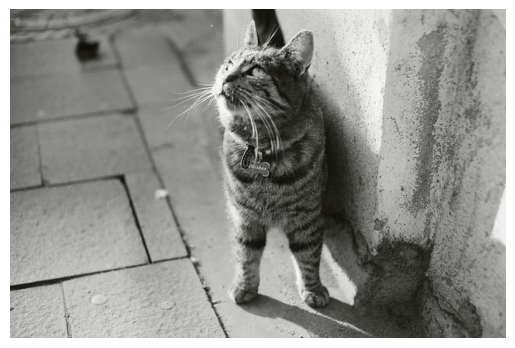

In [36]:
search('cat on a wall')

[{'corpus_id': 1130, 'score': 0.2834860384464264}, {'corpus_id': 54, 'score': 0.27892616391181946}, {'corpus_id': 166, 'score': 0.2563096582889557}]

Query monkey watching at something


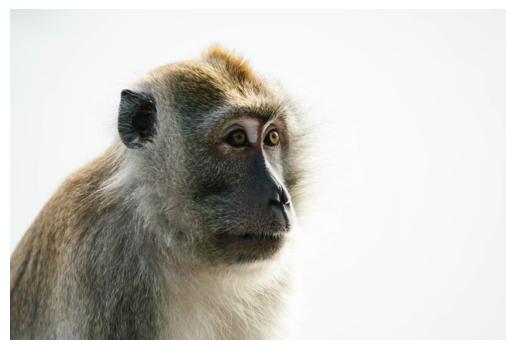

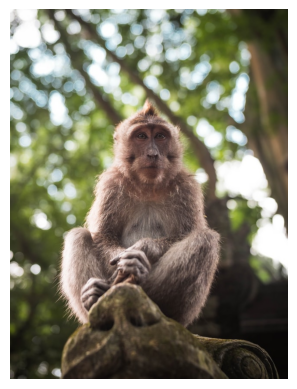

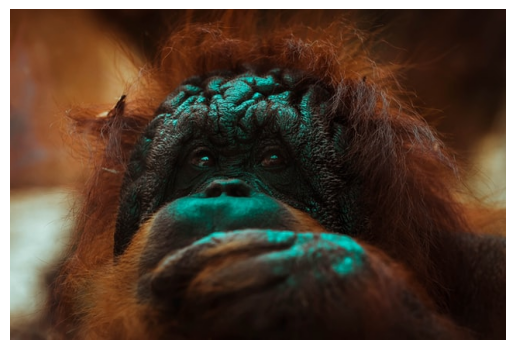

In [40]:
search('monkey watching at something')

[{'corpus_id': 1763, 'score': 0.32649534940719604}, {'corpus_id': 1023, 'score': 0.3103804886341095}, {'corpus_id': 844, 'score': 0.2853417992591858}]

Query blonde horse


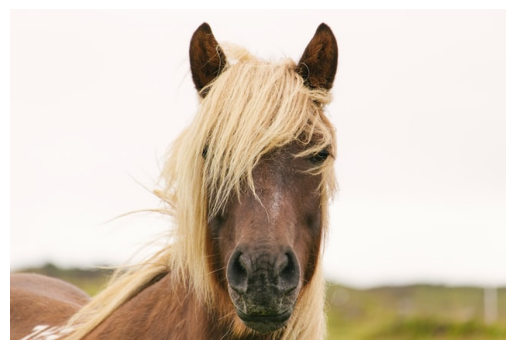

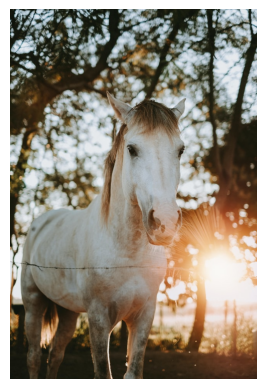

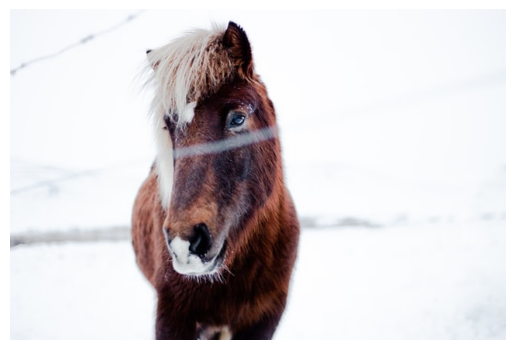

In [45]:
search('blonde horse')